# Bài tập 6

Nguyễn Trọng Nghĩa - 1712615

## Câu 1 (1 điểm)

Vì $H' \subset H$ nên $H'$ khả năng fit còn kém hơn rất nhiều so với $H$ do đó nếu thay thế $H'$ cho $H$ nhìn chung sẽ khiến `deterministic noise tăng.`

Đáp án là [b]

## Câu 2 (1 điểm)

In [13]:
import requests

try:
    with open("in.dta", "x") as f_in: # nếu file dữ liệu không tồn tại 
        request_in = requests.get("http://work.caltech.edu/data/in.dta") # lấy dữ liệu
        f_in.write(request_in.text) # ghi dữ liệu vào file 
        print("Downloaded in.dta")
except FileExistsError: # nếu file đã tồn tại
    print("Training data already downloaded")

try:
    with open("out.dta", "x") as f_out:
        request_out = requests.get("http://work.caltech.edu/data/out.dta")
        f_out.write(request_out.text)
        print("Downloaded out.dta")
except FileExistsError:
    print("Test data already downloaded")

Training data already downloaded
Test data already downloaded


In [14]:
import numpy as np
data_train = np.loadtxt("in.dta") # 2 chiều gồm 3 cột 
x_train, y_train = data_train[:,:2], data_train[:,2] # tách để lấy tập x cột 0 và 1 và y cột 2

data_test = np.loadtxt("out.dta")
x_test, y_test = data_test[:,:2], data_test[:,2]


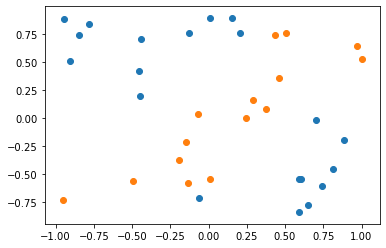

In [15]:
import matplotlib.pyplot as plt
# import seaborn as sns
a = data_train[data_train[:,2] == 1] # trực quan các điểm dữ liệu tập train
b = data_train[data_train[:,2] == -1]
plt.scatter(a[:,0],a[:,1])
plt.scatter(b[:,0],b[:,1])

In [17]:
def transform(X):
    N = X.shape[0] # lấy số dòng của tập X
    X= np.column_stack((np.ones((N,1)),X,X[:,0]**2,X[:,1]**2,X[:,0]*X[:,1],abs(X[:,0]-X[:,1]),abs(X[:,0]+X[:,1])))
    # tương ứng với (1,x1,x2,x1**2,x2**2,x1x2,|x1-x2|,|x1+x2|)
    return X # trả về tập dữ liệu đã chuyển đổi

In [27]:
class LinearRegression:
    def __init__(self,w=0,lamda = 0): # hàm khởi tạo Linearregression
        self.target = w
        self.λ = lamda
        
    def fit(self,X_train,Y_train): # hàm fit xác định hàm mục tiêu.
        N = X_train.shape[1] # lấy số thuộc tính của tập dữ liệu
        X_dagger = np.dot(np.linalg.pinv(np.dot(X_train.T, X_train)+self.λ*np.identity(N)), X_train.T) # cực tiểu độ lỗi MSE
        # thêm regularization ( weight decay)
        w = np.dot(X_dagger, Y_train)
        self.target = w # lưu bộ trọng số
        return w
    
    def score(self,X_train,Y_train): # hàm tính độ chính xác
        sc = np.mean(np.sign(np.dot(X_train,self.target)) == Y_train)
        return sc
    
    def predict(self,X): # hàm dự đoán kết quả 
        pred = np.sign(np.dot(X,self.target))
        return pred

In [19]:
# transform tập train và tập test
xtest = transform(X_test)
xtrain = transform(X_train)

In [21]:
reg2 = LinearRegression() # tạo một đối tượng linearregression,  không có weight decay
w = reg2.fit(xtrain,y_train) # training 
w

array([-1.64706706, -0.14505927,  0.10154121, -2.03296844, -1.82804373,
        2.48152945,  4.15893861,  0.31651714])

In [35]:
print("Lỗi trên tập train là:",1 - reg2.score(xtrain,y_train))

Lỗi trên tập train là: 0.02857142857142858


In [36]:
print("Lỗi trên tập test là:",1 - reg2.score(xtest,y_test))

Lỗi trên tập test là: 0.08399999999999996


Đáp án là: [a]

## Câu 3 (1 điểm)

In [43]:
λ = 10**-3 # với k = -3
reg3 = LinearRegression(lamda = λ) # có thêm weight decay
w = reg3.fit(xtrain,y_train)
w

array([-1.6432827 , -0.14333537,  0.10144329, -2.02456533, -1.81721505,
        2.45550685,  4.14009201,  0.31960135])

In [44]:
print("Lỗi trên tập train k= -3 là:",1 - reg3.score(xtrain,y_train)) # có thêm weight decay

Lỗi trên tập train k= -3 là: 0.02857142857142858


In [45]:
print("Lỗi trên tập test k = -3 là:",1 - reg3.score(xtest,y_test))

Lỗi trên tập test k = -3 là: 0.07999999999999996


Đáp án là [d]

## Câu 4 (1 điểm)

In [40]:
λ = 10**3 # với k =3
reg4 = LinearRegression(lamda = λ) # có thêm weight decay
w = reg4.fit(xtrain,y_train)
w

array([ 0.00435688, -0.00134416,  0.0024939 ,  0.00328695,  0.00484127,
       -0.00862023,  0.01786706, -0.00490192])

In [41]:
print("Lỗi trên tập train k =3 là:",1 - reg4.score(xtrain,y_train))

Lỗi trên tập train k =3 là: 0.37142857142857144


In [42]:
print("Lỗi trên tập test k = 3 là:",1 - reg4.score(xtest,y_test))

Lỗi trên tập test k = 3 là: 0.43600000000000005


Đáp án là [e]

## Câu 5 (1 điểm)

In [58]:
k = [-3,-2,-1,0,1,2,3] # tập k thử nghiệm
for i in k: # tính toán độ lỗi trên tập test với mỗi k
    reg56 = LinearRegression(lamda = 10**i)
    reg56.fit(xtrain,y_train)
    print("Với k = {0} có err_outsample: {1}".format(i,round(1- reg56.score(xtest,y_test),4)))

Với k = -3 có err_outsample: 0.08
Với k = -2 có err_outsample: 0.084
Với k = -1 có err_outsample: 0.056
Với k = 0 có err_outsample: 0.092
Với k = 1 có err_outsample: 0.124
Với k = 2 có err_outsample: 0.228
Với k = 3 có err_outsample: 0.436


Có thể thấy ở trên với k = -1 có độ lỗi tập test thấp nhất.

Đáp án là [d]

## Câu 6 (1 điểm)

Dựa vào kết quả câu 5: Với k = -1 có độ lỗi trên tập test là 0.056.

Đáp án là [b]

## Câu 7 (1 điểm)

Theo như đề bài ta có:
* $H(10,0,3) = H_{2}$ (vì $w_{q} = 0$ khi $q \geq 3$),$ H(10,0,4) = H_{3} $ mà $H_{2} \subset  H_{3}$ $\Rightarrow H_{2}\cap H_{3} = H_{2} \Leftrightarrow H(10,0,3)\cap H(10,0,4) = H_{2} $
* Tương tự có $H(10,0,3)\cup  H(10,0,4) = H_{3}$ 

Đáp án là [c]

In [206]:
from abc import abstractmethod # code mô phỏng mạng nơ ron 
import numpy as np
class Layer():
    def __init__(self):
        self.input= None
        self.output = None
        self.out_shape = None
        self.in_shape = None
    
    @abstractmethod
    def input(self):
        return self.input
    
    @abstractmethod
    def output(self):
        return self.output
    
    @abstractmethod
    def in_shape(self):
        return self.in_shape
    
    @abstractmethod
    def out_shape(self):
        return self.out_shape
    
    @abstractmethod
    def forward_propagation(self,input):
        raise NotImplementedError
        
    @abstractmethod    
    def backward_propagation(self,output_err,learningrate):
        raise NotImplementedError
        
class FClayer():
    def __init__(self,input_shape,output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.weights = np.random.rand(input_shape[1]+1,output_shape[1])-0.5
        
    def forward_propagation(self,input):
        input = np.insert(input, 0, 1., axis=1)
        self.input = input
        self.output = np.dot(self.input ,self.weights)
        return self.output
        
    def backward_propagation(self,output_err,learningrate):
        err_layer = np.dot(output_err,self.weights[1:,:].T) # shape input =δ(l)*w(l).T
        dweights = np.dot(self.input.T,output_err) # tương đương kích thước weights
        self.weights -= learningrate*dweights
        
        return err_layer
       
class ActivationLayer(Layer):
    def __init__(self,inputshape,outputshape,activation,activation_prime):
        self.input_shape = inputshape
        self.output_shape = outputshape
        self.activation = activation
        self.activation_prime = activation_prime
        
    def forward_propagation(self,input):
        self.output =self.activation(input)         
        self.input = input
        return self.output
    
    def backward_propagation(self,output_err,learningrate):
        return self.activation_prime(self.input)*output_err # X_(l-1) *ouput_err (ouput_err = δ(l)*w(l).T)
    
        
class NeuralNetwork():
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
    
    def add(self,layer):
        self.layers.append(layer)
    
    def setup_loss(self,loss,loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime
        
    def predict(self,input):
        
        result = []
        n = len(input)
        for i in range(n):
            output = input[i]
            
            for layer in self.layers:
                output = layer.forward_propagation(output)
                
            result.append(output)
        return result
    
    def fit(self,x_train,y_train,learning_rate,epochs):
        
        n = len(x_train)
        for i in range(epochs):
            err = 0
            for  j in range(n):
                
                # lan truyền tiến
                output = x_train[j]
            
                for layer in self.layers:
                    output = layer.forward_propagation(output) 
                
                # lỗi của mỗi mẫu dữ liệu
                err += self.loss(y_train[j],output)
                
                errL = self.loss_prime(y_train[j],output) # lỗi của lớp cuối
                # lan truyền ngược
                for layer in reversed(self.layers):
                    errL = layer.backward_propagation(errL,learning_rate)
            err = err / n
            
            print("epoch : %d/%d - Err = %f"%(i,epochs,err))

def relu(z):
    return np.maximum(0,z)

def relu_prime(z):
    z[z<0] = 0
    z[z>0] = 1
    return z

def loss(y_true,y_predict):
    return 0.5*(y_predict-y_true)**2

def loss_prime(y_true,y_predict):
    return y_predict - y_true



In [175]:
x_train = np.array([[[0,0]],[[0,1]],[[1,0]],[[1,1]]])
y_train = np.array([[0],[1],[1],[0]])
net = NeuralNetwork()
net.add(FClayer((1,2),(1,3)))
net.add(ActivationLayer((1,3),(1,3),relu,relu_prime))
net.add(FClayer((1,3),(1,1)))
net.add(ActivationLayer((1,1),(1,1),relu,relu_prime))

net.setup_loss(loss,loss_prime)

net.fit(x_train,y_train,epochs =1000,learning_rate = 0.01)

epoch : 0/1000 - Err = 0.142278
epoch : 1/1000 - Err = 0.141083
epoch : 2/1000 - Err = 0.139978
epoch : 3/1000 - Err = 0.138949
epoch : 4/1000 - Err = 0.137985
epoch : 5/1000 - Err = 0.137078
epoch : 6/1000 - Err = 0.136218
epoch : 7/1000 - Err = 0.135401
epoch : 8/1000 - Err = 0.135050
epoch : 9/1000 - Err = 0.134726
epoch : 10/1000 - Err = 0.134410
epoch : 11/1000 - Err = 0.134099
epoch : 12/1000 - Err = 0.133794
epoch : 13/1000 - Err = 0.133494
epoch : 14/1000 - Err = 0.133199
epoch : 15/1000 - Err = 0.132909
epoch : 16/1000 - Err = 0.132622
epoch : 17/1000 - Err = 0.132340
epoch : 18/1000 - Err = 0.132074
epoch : 19/1000 - Err = 0.131838
epoch : 20/1000 - Err = 0.131568
epoch : 21/1000 - Err = 0.131300
epoch : 22/1000 - Err = 0.131035
epoch : 23/1000 - Err = 0.130773
epoch : 24/1000 - Err = 0.130513
epoch : 25/1000 - Err = 0.130255
epoch : 26/1000 - Err = 0.130000
epoch : 27/1000 - Err = 0.129754
epoch : 28/1000 - Err = 0.129555
epoch : 29/1000 - Err = 0.129307
epoch : 30/1000 - Er

epoch : 386/1000 - Err = 0.071545
epoch : 387/1000 - Err = 0.071460
epoch : 388/1000 - Err = 0.071295
epoch : 389/1000 - Err = 0.071121
epoch : 390/1000 - Err = 0.070948
epoch : 391/1000 - Err = 0.070792
epoch : 392/1000 - Err = 0.070703
epoch : 393/1000 - Err = 0.070607
epoch : 394/1000 - Err = 0.070481
epoch : 395/1000 - Err = 0.070309
epoch : 396/1000 - Err = 0.070172
epoch : 397/1000 - Err = 0.070064
epoch : 398/1000 - Err = 0.069894
epoch : 399/1000 - Err = 0.069724
epoch : 400/1000 - Err = 0.069555
epoch : 401/1000 - Err = 0.069477
epoch : 402/1000 - Err = 0.069437
epoch : 403/1000 - Err = 0.069268
epoch : 404/1000 - Err = 0.069099
epoch : 405/1000 - Err = 0.068931
epoch : 406/1000 - Err = 0.068813
epoch : 407/1000 - Err = 0.068694
epoch : 408/1000 - Err = 0.068528
epoch : 409/1000 - Err = 0.068363
epoch : 410/1000 - Err = 0.068298
epoch : 411/1000 - Err = 0.068199
epoch : 412/1000 - Err = 0.068083
epoch : 413/1000 - Err = 0.067918
epoch : 414/1000 - Err = 0.067753
epoch : 415/10

epoch : 842/1000 - Err = 0.011204
epoch : 843/1000 - Err = 0.011065
epoch : 844/1000 - Err = 0.011016
epoch : 845/1000 - Err = 0.010895
epoch : 846/1000 - Err = 0.010843
epoch : 847/1000 - Err = 0.010723
epoch : 848/1000 - Err = 0.010672
epoch : 849/1000 - Err = 0.010562
epoch : 850/1000 - Err = 0.010557
epoch : 851/1000 - Err = 0.010438
epoch : 852/1000 - Err = 0.010385
epoch : 853/1000 - Err = 0.010264
epoch : 854/1000 - Err = 0.010209
epoch : 855/1000 - Err = 0.010094
epoch : 856/1000 - Err = 0.010055
epoch : 857/1000 - Err = 0.009951
epoch : 858/1000 - Err = 0.009900
epoch : 859/1000 - Err = 0.009816
epoch : 860/1000 - Err = 0.009770
epoch : 861/1000 - Err = 0.009674
epoch : 862/1000 - Err = 0.009599
epoch : 863/1000 - Err = 0.009512
epoch : 864/1000 - Err = 0.009449
epoch : 865/1000 - Err = 0.009384
epoch : 866/1000 - Err = 0.009300
epoch : 867/1000 - Err = 0.009228
epoch : 868/1000 - Err = 0.009143
epoch : 869/1000 - Err = 0.009118
epoch : 870/1000 - Err = 0.009022
epoch : 871/10

In [188]:
out = net.predict([[[0,1]]])
print(out)
x_train.shape

[array([[0.4133517]])]


(4, 1, 2)

In [244]:
import numpy as np
data_train = np.loadtxt("in.dta")
X_train, y_train = data_train[:,:2], data_train[:,2]

data_test = np.loadtxt("out.dta")
X_test, y_test = data_test[:,:2], data_test[:,2]

X_train = X_train[:,np.newaxis]
y_train


array([ 1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
        1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.])

In [243]:
net = NeuralNetwork()
net.add(FClayer((1,2),(1,4)))
net.add(ActivationLayer((1,4),(1,4),relu,relu_prime))
net.add(FClayer((1,4),(1,4)))
net.add(ActivationLayer((1,4),(1,4),relu,relu_prime))
net.add(FClayer((1,4),(1,1)))
net.add(ActivationLayer((1,1),(1,1),relu,relu_prime))

net.setup_loss(loss,loss_prime)

net.fit(X_train,y_train,epochs =2000,learning_rate = 0.01)

epoch : 0/2000 - Err = 0.499465
epoch : 1/2000 - Err = 0.498489
epoch : 2/2000 - Err = 0.497811
epoch : 3/2000 - Err = 0.497299
epoch : 4/2000 - Err = 0.496885
epoch : 5/2000 - Err = 0.496532
epoch : 6/2000 - Err = 0.496221
epoch : 7/2000 - Err = 0.495938
epoch : 8/2000 - Err = 0.495677
epoch : 9/2000 - Err = 0.495430
epoch : 10/2000 - Err = 0.495193
epoch : 11/2000 - Err = 0.494962
epoch : 12/2000 - Err = 0.494735
epoch : 13/2000 - Err = 0.494507
epoch : 14/2000 - Err = 0.494276
epoch : 15/2000 - Err = 0.494040
epoch : 16/2000 - Err = 0.493794
epoch : 17/2000 - Err = 0.493536
epoch : 18/2000 - Err = 0.493263
epoch : 19/2000 - Err = 0.492971
epoch : 20/2000 - Err = 0.492657
epoch : 21/2000 - Err = 0.492317
epoch : 22/2000 - Err = 0.491945
epoch : 23/2000 - Err = 0.491538
epoch : 24/2000 - Err = 0.491089
epoch : 25/2000 - Err = 0.490592
epoch : 26/2000 - Err = 0.490040
epoch : 27/2000 - Err = 0.489425
epoch : 28/2000 - Err = 0.488741
epoch : 29/2000 - Err = 0.488084
epoch : 30/2000 - Er

epoch : 273/2000 - Err = 0.231955
epoch : 274/2000 - Err = 0.231585
epoch : 275/2000 - Err = 0.231443
epoch : 276/2000 - Err = 0.231341
epoch : 277/2000 - Err = 0.231619
epoch : 278/2000 - Err = 0.235118
epoch : 279/2000 - Err = 0.232276
epoch : 280/2000 - Err = 0.231526
epoch : 281/2000 - Err = 0.231269
epoch : 282/2000 - Err = 0.231383
epoch : 283/2000 - Err = 0.233120
epoch : 284/2000 - Err = 0.231712
epoch : 285/2000 - Err = 0.231323
epoch : 286/2000 - Err = 0.231155
epoch : 287/2000 - Err = 0.231075
epoch : 288/2000 - Err = 0.231011
epoch : 289/2000 - Err = 0.230956
epoch : 290/2000 - Err = 0.230908
epoch : 291/2000 - Err = 0.230963
epoch : 292/2000 - Err = 0.232896
epoch : 293/2000 - Err = 0.231467
epoch : 294/2000 - Err = 0.231060
epoch : 295/2000 - Err = 0.231371
epoch : 296/2000 - Err = 0.235153
epoch : 297/2000 - Err = 0.231936
epoch : 298/2000 - Err = 0.231147
epoch : 299/2000 - Err = 0.230894
epoch : 300/2000 - Err = 0.230788
epoch : 301/2000 - Err = 0.230728
epoch : 302/20

epoch : 535/2000 - Err = 0.227343
epoch : 536/2000 - Err = 0.227326
epoch : 537/2000 - Err = 0.229290
epoch : 538/2000 - Err = 0.232739
epoch : 539/2000 - Err = 0.227646
epoch : 540/2000 - Err = 0.227277
epoch : 541/2000 - Err = 0.227213
epoch : 542/2000 - Err = 0.227224
epoch : 543/2000 - Err = 0.227226
epoch : 544/2000 - Err = 0.227170
epoch : 545/2000 - Err = 0.227151
epoch : 546/2000 - Err = 0.227181
epoch : 547/2000 - Err = 0.227126
epoch : 548/2000 - Err = 0.227101
epoch : 549/2000 - Err = 0.227085
epoch : 550/2000 - Err = 0.227114
epoch : 551/2000 - Err = 0.227057
epoch : 552/2000 - Err = 0.227032
epoch : 553/2000 - Err = 0.227012
epoch : 554/2000 - Err = 0.226996
epoch : 555/2000 - Err = 0.227020
epoch : 556/2000 - Err = 0.226963
epoch : 557/2000 - Err = 0.226937
epoch : 558/2000 - Err = 0.226915
epoch : 559/2000 - Err = 0.226898
epoch : 560/2000 - Err = 0.226920
epoch : 561/2000 - Err = 0.226862
epoch : 562/2000 - Err = 0.226834
epoch : 563/2000 - Err = 0.228649
epoch : 564/20

epoch : 789/2000 - Err = 0.221447
epoch : 790/2000 - Err = 0.221439
epoch : 791/2000 - Err = 0.221554
epoch : 792/2000 - Err = 0.221374
epoch : 793/2000 - Err = 0.221528
epoch : 794/2000 - Err = 0.221450
epoch : 795/2000 - Err = 0.221278
epoch : 796/2000 - Err = 0.221576
epoch : 797/2000 - Err = 0.221363
epoch : 798/2000 - Err = 0.221233
epoch : 799/2000 - Err = 0.221622
epoch : 800/2000 - Err = 0.221264
epoch : 801/2000 - Err = 0.221131
epoch : 802/2000 - Err = 0.221642
epoch : 803/2000 - Err = 0.221178
epoch : 804/2000 - Err = 0.221083
epoch : 805/2000 - Err = 0.221662
epoch : 806/2000 - Err = 0.218107
epoch : 807/2000 - Err = 0.221574
epoch : 808/2000 - Err = 0.221031
epoch : 809/2000 - Err = 0.221025
epoch : 810/2000 - Err = 0.221671
epoch : 811/2000 - Err = 0.220956
epoch : 812/2000 - Err = 0.220881
epoch : 813/2000 - Err = 0.221669
epoch : 814/2000 - Err = 0.220871
epoch : 815/2000 - Err = 0.220825
epoch : 816/2000 - Err = 0.221665
epoch : 817/2000 - Err = 0.220774
epoch : 818/20

epoch : 1041/2000 - Err = 0.219189
epoch : 1042/2000 - Err = 0.215947
epoch : 1043/2000 - Err = 0.219185
epoch : 1044/2000 - Err = 0.215877
epoch : 1045/2000 - Err = 0.219181
epoch : 1046/2000 - Err = 0.215814
epoch : 1047/2000 - Err = 0.219176
epoch : 1048/2000 - Err = 0.215269
epoch : 1049/2000 - Err = 0.214998
epoch : 1050/2000 - Err = 0.214806
epoch : 1051/2000 - Err = 0.214669
epoch : 1052/2000 - Err = 0.215318
epoch : 1053/2000 - Err = 0.219150
epoch : 1054/2000 - Err = 0.215756
epoch : 1055/2000 - Err = 0.219181
epoch : 1056/2000 - Err = 0.215699
epoch : 1057/2000 - Err = 0.219186
epoch : 1058/2000 - Err = 0.215617
epoch : 1059/2000 - Err = 0.219201
epoch : 1060/2000 - Err = 0.215540
epoch : 1061/2000 - Err = 0.219210
epoch : 1062/2000 - Err = 0.215467
epoch : 1063/2000 - Err = 0.219138
epoch : 1064/2000 - Err = 0.215222
epoch : 1065/2000 - Err = 0.215327
epoch : 1066/2000 - Err = 0.219043
epoch : 1067/2000 - Err = 0.215195
epoch : 1068/2000 - Err = 0.215207
epoch : 1069/2000 - 

epoch : 1299/2000 - Err = 0.214286
epoch : 1300/2000 - Err = 0.214286
epoch : 1301/2000 - Err = 0.214286
epoch : 1302/2000 - Err = 0.214286
epoch : 1303/2000 - Err = 0.214286
epoch : 1304/2000 - Err = 0.214286
epoch : 1305/2000 - Err = 0.214286
epoch : 1306/2000 - Err = 0.214286
epoch : 1307/2000 - Err = 0.214286
epoch : 1308/2000 - Err = 0.214286
epoch : 1309/2000 - Err = 0.214286
epoch : 1310/2000 - Err = 0.214286
epoch : 1311/2000 - Err = 0.214286
epoch : 1312/2000 - Err = 0.214286
epoch : 1313/2000 - Err = 0.214286
epoch : 1314/2000 - Err = 0.214286
epoch : 1315/2000 - Err = 0.214286
epoch : 1316/2000 - Err = 0.214286
epoch : 1317/2000 - Err = 0.214286
epoch : 1318/2000 - Err = 0.214286
epoch : 1319/2000 - Err = 0.214286
epoch : 1320/2000 - Err = 0.214286
epoch : 1321/2000 - Err = 0.214286
epoch : 1322/2000 - Err = 0.214286
epoch : 1323/2000 - Err = 0.214286
epoch : 1324/2000 - Err = 0.214286
epoch : 1325/2000 - Err = 0.214286
epoch : 1326/2000 - Err = 0.214286
epoch : 1327/2000 - 

epoch : 1564/2000 - Err = 0.214286
epoch : 1565/2000 - Err = 0.214286
epoch : 1566/2000 - Err = 0.214286
epoch : 1567/2000 - Err = 0.214286
epoch : 1568/2000 - Err = 0.214286
epoch : 1569/2000 - Err = 0.214286
epoch : 1570/2000 - Err = 0.214286
epoch : 1571/2000 - Err = 0.214286
epoch : 1572/2000 - Err = 0.214286
epoch : 1573/2000 - Err = 0.214286
epoch : 1574/2000 - Err = 0.214286
epoch : 1575/2000 - Err = 0.214286
epoch : 1576/2000 - Err = 0.214286
epoch : 1577/2000 - Err = 0.214286
epoch : 1578/2000 - Err = 0.214286
epoch : 1579/2000 - Err = 0.214286
epoch : 1580/2000 - Err = 0.214286
epoch : 1581/2000 - Err = 0.214286
epoch : 1582/2000 - Err = 0.214286
epoch : 1583/2000 - Err = 0.214286
epoch : 1584/2000 - Err = 0.214286
epoch : 1585/2000 - Err = 0.214286
epoch : 1586/2000 - Err = 0.214286
epoch : 1587/2000 - Err = 0.214286
epoch : 1588/2000 - Err = 0.214286
epoch : 1589/2000 - Err = 0.214286
epoch : 1590/2000 - Err = 0.214286
epoch : 1591/2000 - Err = 0.214286
epoch : 1592/2000 - 

epoch : 1805/2000 - Err = 0.214286
epoch : 1806/2000 - Err = 0.214286
epoch : 1807/2000 - Err = 0.214286
epoch : 1808/2000 - Err = 0.214286
epoch : 1809/2000 - Err = 0.214286
epoch : 1810/2000 - Err = 0.214286
epoch : 1811/2000 - Err = 0.214286
epoch : 1812/2000 - Err = 0.214286
epoch : 1813/2000 - Err = 0.214286
epoch : 1814/2000 - Err = 0.214286
epoch : 1815/2000 - Err = 0.214286
epoch : 1816/2000 - Err = 0.214286
epoch : 1817/2000 - Err = 0.214286
epoch : 1818/2000 - Err = 0.214286
epoch : 1819/2000 - Err = 0.214286
epoch : 1820/2000 - Err = 0.214286
epoch : 1821/2000 - Err = 0.214286
epoch : 1822/2000 - Err = 0.214286
epoch : 1823/2000 - Err = 0.214286
epoch : 1824/2000 - Err = 0.214286
epoch : 1825/2000 - Err = 0.214286
epoch : 1826/2000 - Err = 0.214286
epoch : 1827/2000 - Err = 0.214286
epoch : 1828/2000 - Err = 0.214286
epoch : 1829/2000 - Err = 0.214286
epoch : 1830/2000 - Err = 0.214286
epoch : 1831/2000 - Err = 0.214286
epoch : 1832/2000 - Err = 0.214286
epoch : 1833/2000 - 

In [245]:
X_test =  X_test[:,np.newaxis]
pred = net.predict(X_test)
print(pred)

[array([[0.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.94242701]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[1.]]), array([[0.]]), array([[0.8338838]]), array([[0.]]), array([[0.]]), array([[0.88555719]]), array([[0.]]), array([[0.]]), array([[0.]]), array([[0.]]), a

In [246]:
pred = np.array(pred)
pred[pred > 0.5] = 1
pred[pred <= 0.5] = -1
np.mean(pred == y_test)

0.50112

## Câu 8 (1 điểm)

Với mạng nơ-ron kết nối đầy đủ có $L = 2, d^{(0)} = 5 , d^{(1)} = 3 , d^{(2)} = 1.$ 

In [59]:
d0 =5
d1 =3
d2 =1
# lan truyền tiến
layer0_1 = (d0+1)*3 # bao gồm cả x_0 = 1 layer0 (input) 
layer1_2 = (d1+1)*1 # bao gồm cả x_0 =1 ở layer1
# tinh δ ở mỗi lớp
layer2 = 0 # δ ở lớp ra (lớp 2) đã được tính và đưa vào hàm backpropagation
layer1 = d1  # tính δ ở lớp 1 từ δ lớp 2 và lớp 1 có 3 neural
# lan truyền ngược cập nhật w 
layer2_1  = 1*(d1+1) # cập nhật mỗi w ở các lớp (cập nhật cả bias x_0 =1)
layer1_0 = 3*(d0+1)
print("Tổng số bước backpropagation trên một mẫu dữ liệu: ",layer0_1+layer1_2+layer2+layer1+layer2_1+layer1_0)

Tổng số bước backpropagation trên một mẫu dữ liệu:  47


Đáp án là [d]

## Câu 9 (1 điểm)

Theo đề bài: $x_{0}$ cũng xem là unit
* input gồm 10 units ( bao gồm cả bias $x_{0} = 1$)
* output gồm 1 unit
* 36 units ẩn

Để có số lượng trọng số nhỏ nhất khi số lượng unit của mỗi lớp là ít nhất.

Số lượng unit ít nhất của 1 lớp có thể là 2 (1 neural và 1 bias) 

$\Rightarrow $ với 36 unit mạng có 18 lớp ẩn.

In [2]:
# lớp đầu tiên
num_weights_layer1 = 10*1
# 18 lớp và lớp output sẽ có 18 khoảng mỗi khoảng có 2 weights
num_weights_18layer = 2*18 # vì chỉ có 1 neural ở lỗi lớp do đó mỗi lớp sẽ có số trọng số là 2 
print("SỐ lượng trọng số nhỏ nhất là: ",num_weights_layer1+num_weights_18layer)

SỐ lượng trọng số nhỏ nhất là:  46


Đáp án là [a]

## Câu 10 (1 điểm)

Để mạng có thể đạt số lượng trọng số tối đa khi mạng có 4 lớp trong đó có 2 Lớp Ẩn (có tổng cộng 36 unit).

Vì Số lượng trọng số tăng mạnh nhất khi tăng số neural lớp giữa 2 lớp có số neural lớn nhất

Xét quá trình tính trọng số sau:

In [7]:
hiddens =36 # số lượng unit đề cho
number_weights = 0 
weights = []
for i in range(2,36):
    L2 = hiddens-i  # L1 + L2 =36
    L1 = i
    number_weights = 0
    number_weights += 10*(L1-1) # L1 - 1 loại đi neural bias ở lớp L1
    number_weights += L1*(L2 -1) # L2 - 2 loại đi neural bias ở lớp L2
    number_weights += L2*1
    weights.append(number_weights)
    print("10 -",i,"-",hiddens - i,"- 1 Có số lượng trọng số: ",number_weights)
print("----------------------------------------------------")
print("Số lượng trọng số lớn nhất có thể là: ",max(weights))

10 - 2 - 34 - 1 Có số lượng trọng số:  110
10 - 3 - 33 - 1 Có số lượng trọng số:  149
10 - 4 - 32 - 1 Có số lượng trọng số:  186
10 - 5 - 31 - 1 Có số lượng trọng số:  221
10 - 6 - 30 - 1 Có số lượng trọng số:  254
10 - 7 - 29 - 1 Có số lượng trọng số:  285
10 - 8 - 28 - 1 Có số lượng trọng số:  314
10 - 9 - 27 - 1 Có số lượng trọng số:  341
10 - 10 - 26 - 1 Có số lượng trọng số:  366
10 - 11 - 25 - 1 Có số lượng trọng số:  389
10 - 12 - 24 - 1 Có số lượng trọng số:  410
10 - 13 - 23 - 1 Có số lượng trọng số:  429
10 - 14 - 22 - 1 Có số lượng trọng số:  446
10 - 15 - 21 - 1 Có số lượng trọng số:  461
10 - 16 - 20 - 1 Có số lượng trọng số:  474
10 - 17 - 19 - 1 Có số lượng trọng số:  485
10 - 18 - 18 - 1 Có số lượng trọng số:  494
10 - 19 - 17 - 1 Có số lượng trọng số:  501
10 - 20 - 16 - 1 Có số lượng trọng số:  506
10 - 21 - 15 - 1 Có số lượng trọng số:  509
10 - 22 - 14 - 1 Có số lượng trọng số:  510
10 - 23 - 13 - 1 Có số lượng trọng số:  509
10 - 24 - 12 - 1 Có số lượng trọng số:  

Đáp án là [e]